Accuracy: 0.6666666666666666


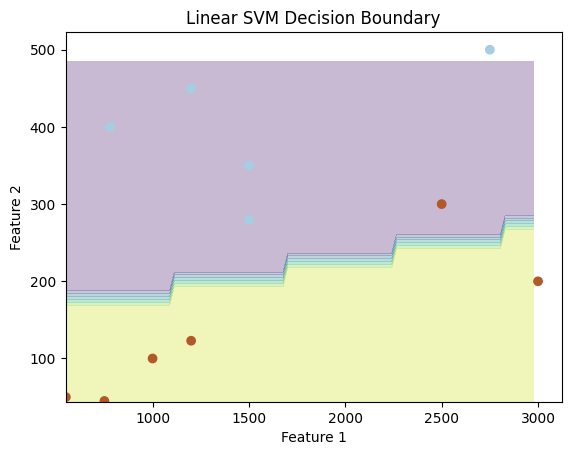

In [16]:
# Example linear 
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("../day5/data/svm_hyperplane.csv")  

# Separate features (X) and labels (y)
x = data[['size', 'price']]
y = LabelEncoder().fit_transform(data['sold'])

model = SVC(kernel='linear')
model.fit(x, y)

X = np.array(x)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an RBF SVM classifier
svm_model = SVC(kernel='linear') 

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundary (for 2D data)
if X.shape[1] == 2:
    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on the meshgrid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Linear SVM Decision Boundary")
    plt.show()

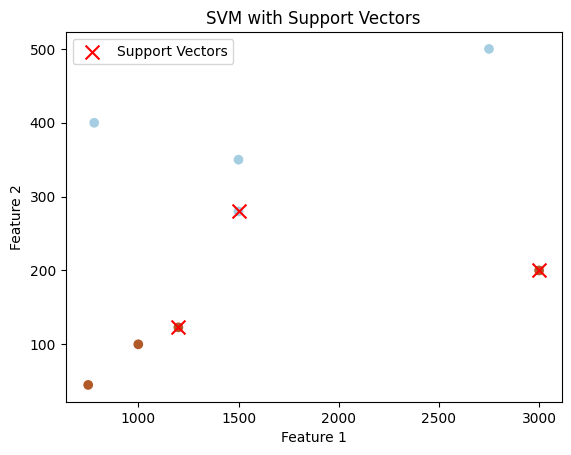

In [17]:
# Get the indices of support vectors
support_vector_indices = svm_model.support_

# Get the support vectors themselves
support_vectors = X_train[support_vector_indices]

# Visualize support vectors (for 2D data)
if X.shape[1] == 2:
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', s=100, label='Support Vectors')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM with Support Vectors")
    plt.legend()
    plt.show()

Accuracy: 0.9545


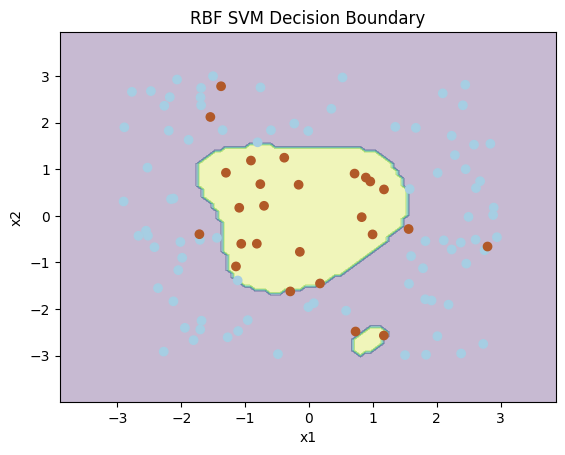

In [18]:
# Example RBF
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("../day5/data/svm_rbf.csv")  
# with pd.option_context('display.max_rows', 8): display(data)

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # Assuming the last column is the label
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an RBF SVM classifier
svm_model = SVC(kernel='rbf', gamma= 1.0, C=2.0)  # You can adjust the gamma parameter

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot decision boundary (for 2D data)
if X.shape[1] == 2:
    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))

    # Predict on the meshgrid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("RBF SVM Decision Boundary")
    plt.show()

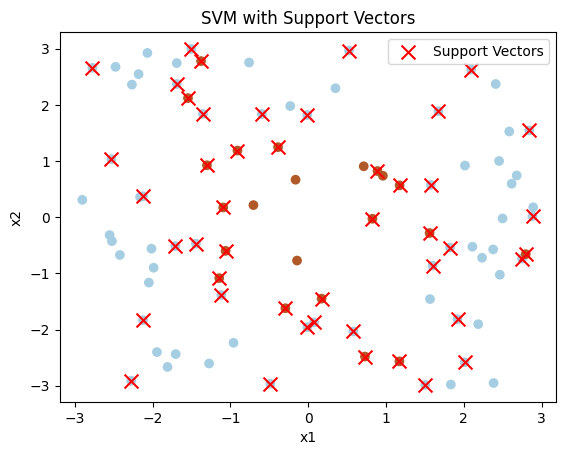

Support Vectors: [29 17]


In [19]:
# Get the indices of support vectors
support_vector_indices = svm_model.support_

# Get the support vectors themselves
support_vectors = X_train[support_vector_indices]

# Visualize support vectors (for 2D data)
if X.shape[1] == 2:
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', 
                marker='x', s=100, label='Support Vectors')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("SVM with Support Vectors")
    plt.legend()
    plt.show()
print('Support Vectors:',svm_model.n_support_)

,x1,x2,y
0,0.042214,0.582815,-1
1,-1.100619,1.144724,1
2,0.901591,0.502494,-1
3,0.900856,-0.683728,1
...,...,...,...
150,-1.021886,0.794528,1
151,0.852704,0.035360,-1
152,-1.873161,0.920615,1
153,-0.035368,2.110605,1


Accuracy: 0.8387096774193549


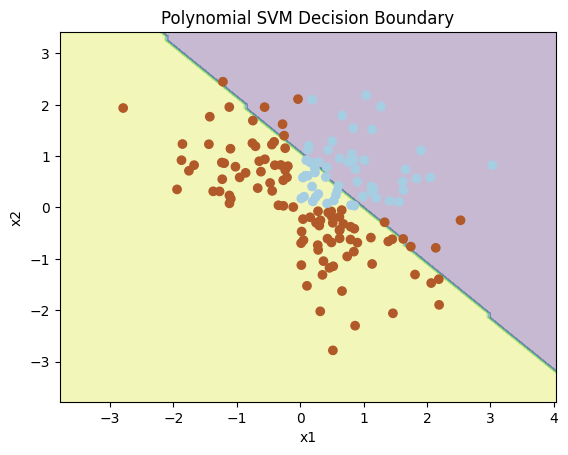

In [20]:
# Example Polynomial
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("../day5/data/svm_poly.csv")  
with pd.option_context('display.max_rows', 8): display(data)
# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # Assuming the last column is the label
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Polynomial SVM classifier
svm_model = SVC(kernel='poly', degree=1, C=2.0)  # You can adjust degree and C

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot decision boundary (for 2D data)
if X.shape[1] == 2:
    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on the meshgrid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Polynomial SVM Decision Boundary")
    plt.show()

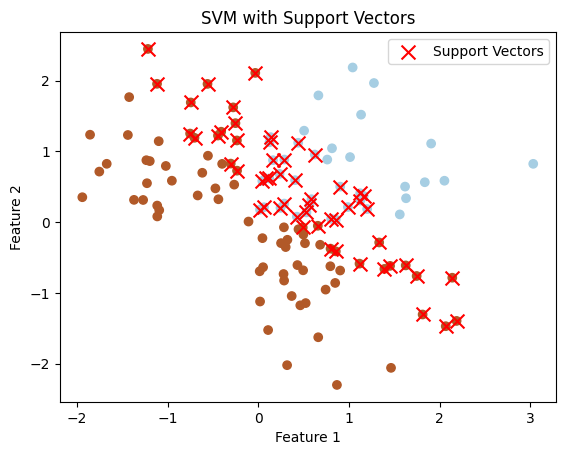

Support Vectors: [27 28]


In [21]:
# Get the indices of support vectors
support_vector_indices = svm_model.support_

# Get the support vectors themselves
support_vectors = X_train[support_vector_indices]

# Visualize support vectors (for 2D data)
if X.shape[1] == 2:
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='x', s=100, label='Support Vectors')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM with Support Vectors")
    plt.legend()
    plt.show()
print('Support Vectors:',svm_model.n_support_)